In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from load_data import get_data
from graphs import *
from statistical_tests import *

## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



# Hard-Coded Area:

In [2]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearance_between_visit,clearance_between_visit,------------,unmoved_visit_nr
0,1.Gasek,57,57,1,1,10.435940,10.435942,,1
1,1.Gasek,958,1015,4,2,14.814190,-1.710566,,2
2,1.Gasek,70,1085,1,3,10.424290,-2.877283,,3
3,1.Gasek,63,1148,1,4,24.239930,24.671780,,4
4,1.Gasek,238,1386,3,5,17.252580,-0.692089,,5
5,2. Kolodziejska,217,217,2,1,66.956580,66.956580,,1
6,2. Kolodziejska,42,259,0,2,41.810011,6.917547,,2
7,2. Kolodziejska,26,285,0,5,25.568145,-10.812106,,5
8,2. Kolodziejska,294,579,3,6,86.486312,22.210066,,6
9,4. Krzyszton,35,35,0,1,-46.287701,-17.363140,,3


### Wyniki - totalna poprawa:

In [3]:
def get_stats_for_abstract(df):
    data = df.groupby(by  = 'surname', as_index = False).agg({'total_clearance_between_visit' : 'max'})
    all_patients = len(data)

    x = data.total_clearance_between_visit.median()
    print('median of maximum total clearence:', x)

    x = len(data.loc[data['total_clearance_between_visit'] >=25] )
    x = x / all_patients * 100 
    print('% of patients that had a total_clearence of minimum 25%:', x)

    x = len(data.loc[data['total_clearance_between_visit'] >=50] )
    x = x / all_patients * 100 
    print('% of patients that had a total_clearence of minimum 50%:', x)

    x = len(data.loc[data['total_clearance_between_visit'] >=75] )
    x = x / all_patients * 100 
    print('% of patients that had a total_clearence of minimum 75%:', x)

    x = len(data.loc[data['total_clearance_between_visit'] >=90] )
    x = x / all_patients * 100 
    print('% of patients that had a total_clearence of minimum 90%:', x)

    return data
data = get_stats_for_abstract(non_moved_df)

median of maximum total clearence: 42.39433388
% of patients that had a total_clearence of minimum 25%: 70.3125
% of patients that had a total_clearence of minimum 50%: 39.0625
% of patients that had a total_clearence of minimum 75%: 6.25
% of patients that had a total_clearence of minimum 90%: 1.5625


In [4]:
data

,surname,total_clearance_between_visit
0,1.Gasek,24.239930
1,10.Bedzinowski szyja,28.004268
2,11. Cicha-kwiecien,36.375669
3,12. Januszewska,56.055361
4,13.Zborowski,49.208570
...,...,...
59,7. Kowal,72.177446
60,70. Wojcicki,66.837401
61,71. Zajac,9.855161
62,8.Wierny,57.510214


In [20]:
# def get_stats_for_abstract_first_2(df, visit_number_buckets):
#     means = []
#     for next_bucket in visit_number_buckets:
#         if next_bucket == 0:
#             previous_bucket = 0
#             continue
#         print('bucket:', next_bucket)
#         data = df.loc[(df['visit_number'] > previous_bucket) & (df['visit_number'] <= next_bucket )]
#         mean_clearence = data.clearance_between_visit.mean()
#         means.append(mean_clearence)
#         previous_bucket = next_bucket

#     print(means)
#     return data


# get_stats_for_abstract_first_2(non_moved_df, [0,2,5,10,15,20])



def get_stats_for_abstract_first_2(df, visit_number_buckets):
    maxes = []
    for next_bucket in visit_number_buckets:
        if next_bucket == 0:
            previous_bucket = 0
            continue
        print('bucket:', next_bucket)
        data = df.loc[(df['visit_number'] <= next_bucket )]
        data = data.groupby(by  = 'surname', as_index = False).agg({'total_clearance_between_visit' : 'max'})
        max_total_clearaence = data.total_clearance_between_visit.median()
        maxes.append(max_total_clearaence)
        previous_bucket = next_bucket

    print(maxes)
    return data


get_stats_for_abstract_first_2(non_moved_df, [0,2,5,10,15,20])

bucket: 2
bucket: 5
bucket: 10
bucket: 15
bucket: 20
[42.39433388, 46.608700255, 49.43743904, 43.02442326, 51.5004547]


,surname,total_clearance_between_visit
0,13.Zborowski,22.316534
1,17. Gorszczak,51.500455
2,18.Mincberg,47.017114
3,22. Kosciolek,56.692912
4,39. Pekała twarz,59.896040
5,54. Antosik,1.275500
6,9. Bedzinowski twarz,58.583443


In [ ]:
# Print some overall info such as:
# nr of people w. different number of visits
# nr of people in different waiting buckets

# Main Graphs
### Srednia poprawa miedzy wizytami:

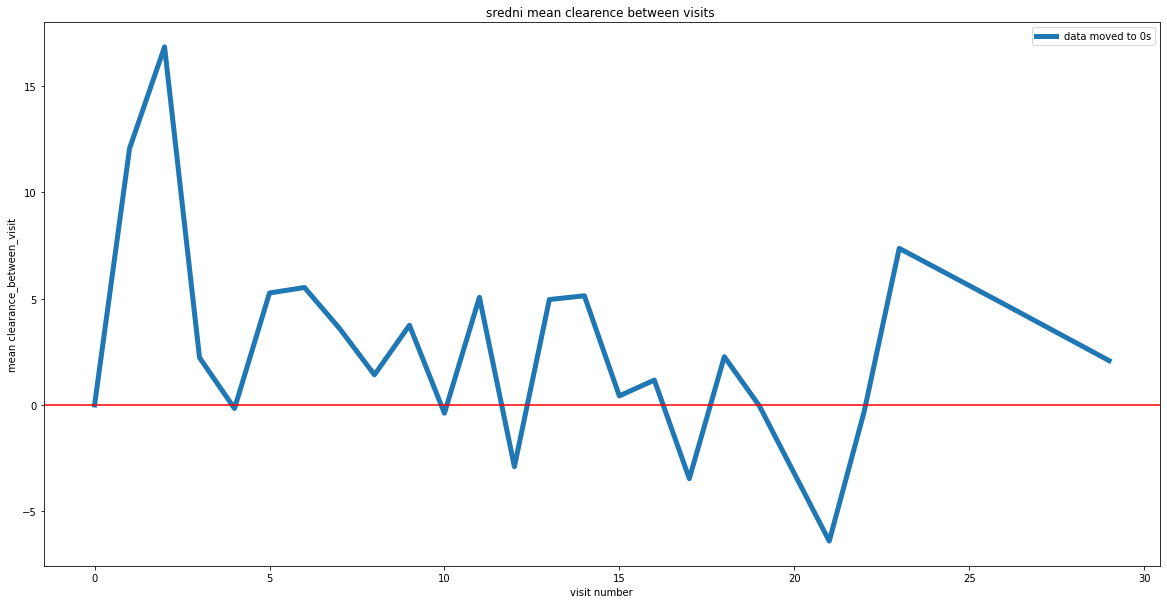

In [4]:
plt.figure(figsize=(20,10))
plt.title("srednia poprawa miedzy wizytami")
agg_column_graph(moved_df, label = 'data moved to 0s')
plt.legend()

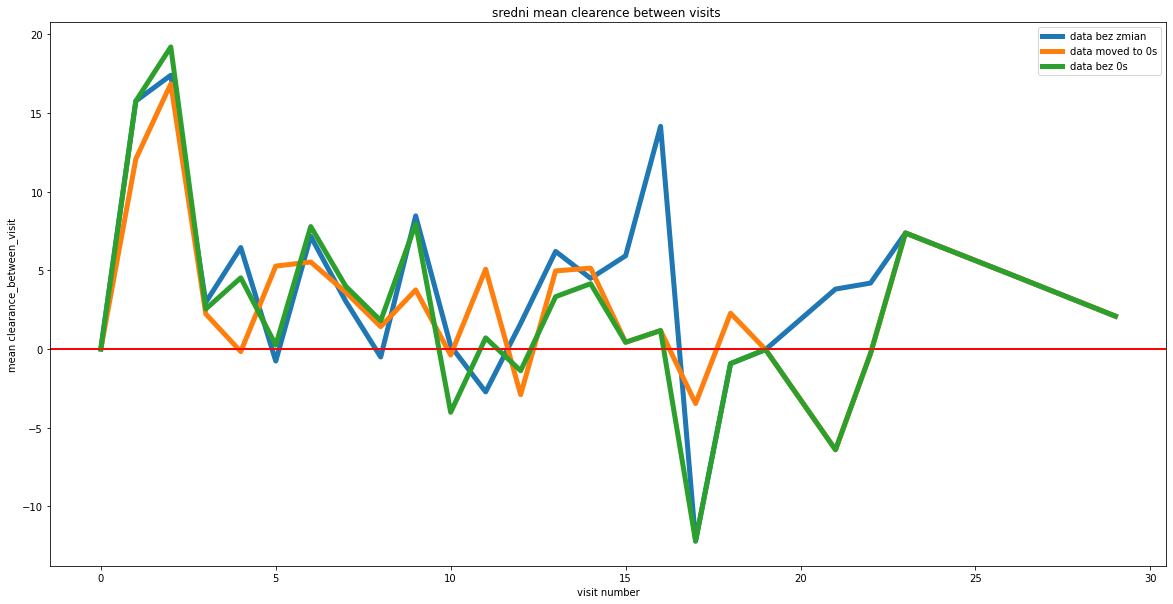

In [5]:
plt.figure(figsize=(20,10))
agg_column_graph(non_moved_df, label = 'data bez zmian')
agg_column_graph(moved_df, label = 'data moved to 0s')
agg_column_graph(non0s_df, label = 'data bez 0s')

### Showcase of how tests works:

In [6]:
chi_squared_test(non_moved_df, name = 'example test', display_data = True)


,surname,time,summed_time,time_group,visit_number,total_clearance_between_visit,clearance_between_visit,------------,below 0
0,1.Gasek,57,57,1,1,10.43594,10.435942,,False
1,1.Gasek,958,1015,4,2,14.81419,-1.710566,,True
2,1.Gasek,70,1085,1,3,10.42429,-2.877283,,True
3,1.Gasek,63,1148,1,4,24.23993,24.671780,,False
4,1.Gasek,238,1386,3,5,17.25258,-0.692089,,True


GROUPS: [0, 90, 180, 270, 360]


time_group,0,1,2,3,4
below 0,,,,,
False,100,100,19,6,2
True,50,36,8,5,8


p-value of chi squred contigency test for example test: 0.008694133019279867 (w. Yates correction - good practice)
expected frequencies were:


,0,1,2,3,4
False,101.946108,92.431138,18.350299,7.476048,6.796407
True,48.053892,43.568862,8.649701,3.523952,3.203593


## Time Group based avg graphs:
* Removed graphs for patients after 15th and 20th visit - since there is barely any data there

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.573 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.840710339606448 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.693 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.28765142316580006 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.728 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.09552324847745401 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.843 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.039411056272496026 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,43,96,129,173
1,100,20,69,95,120
2,200,11,29,33,41


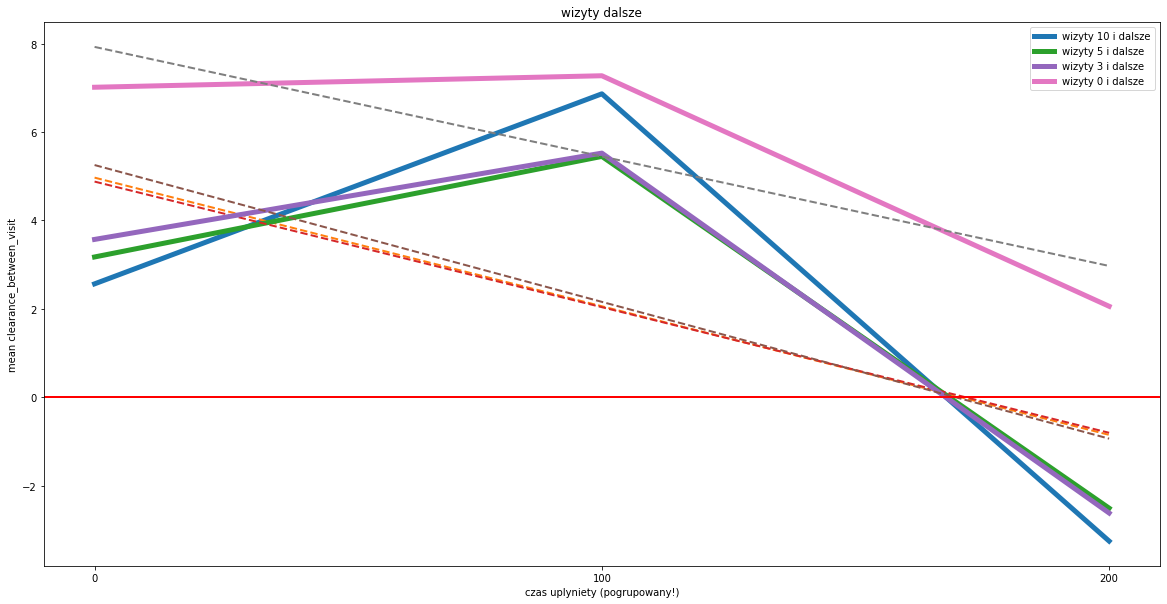

In [7]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200], increment = 100)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.913 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.990 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.43640318420667534 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.954 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.03569128983853699 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.919 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.0028516294030706134 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,59,149,203,268
1,200,14,42,48,56
2,400,1,3,6,10


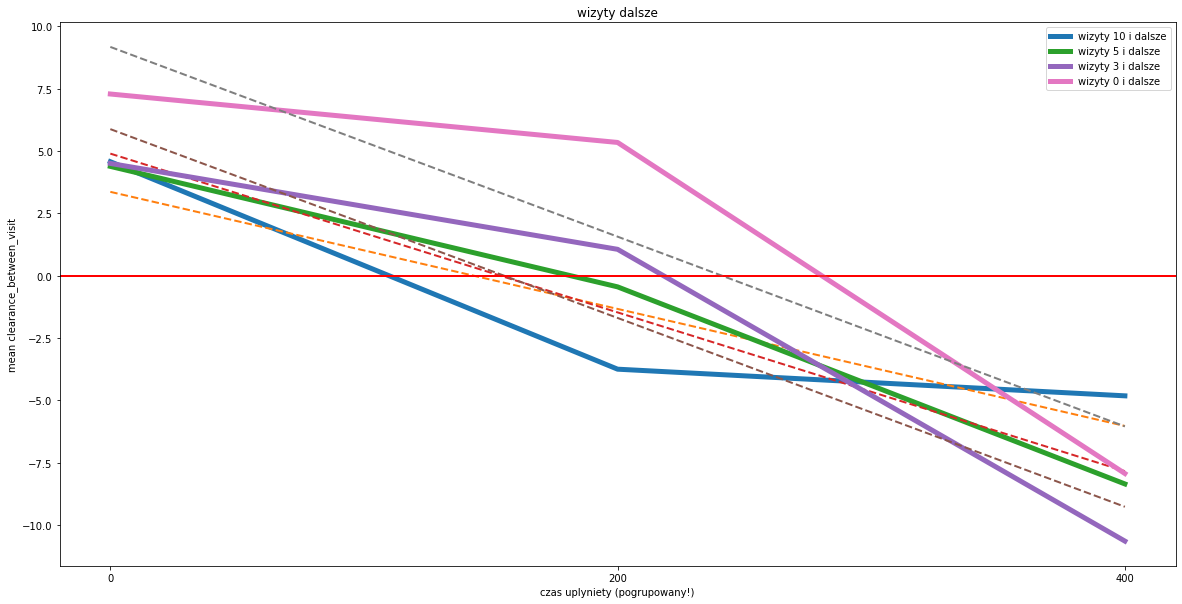

In [8]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,200,400], increment = 200)

In [9]:
# graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200,300], increment = 100) # I dont like this one

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.847 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.909 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.4035177976471759 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.880 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.026583876304082543 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.932 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.003380220933446717 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,47,112,151,207
1,120,17,57,78,93
2,240,9,22,22,24
3,360,1,3,6,10


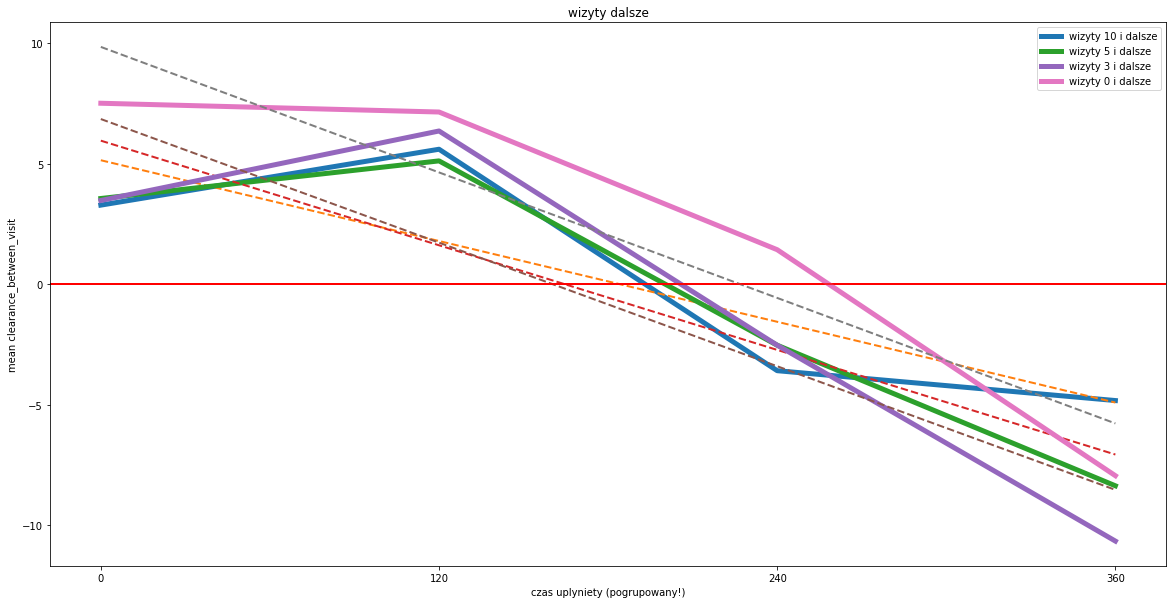

In [10]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,120,240,360], increment = 120)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.799 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.840 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.39986739991268033 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.849 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.06534779950198023 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.826 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.008694133019279867 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,38,85,113,150
1,90,24,75,105,136
2,180,9,21,23,27
3,270,2,10,10,11
4,360,1,3,6,10


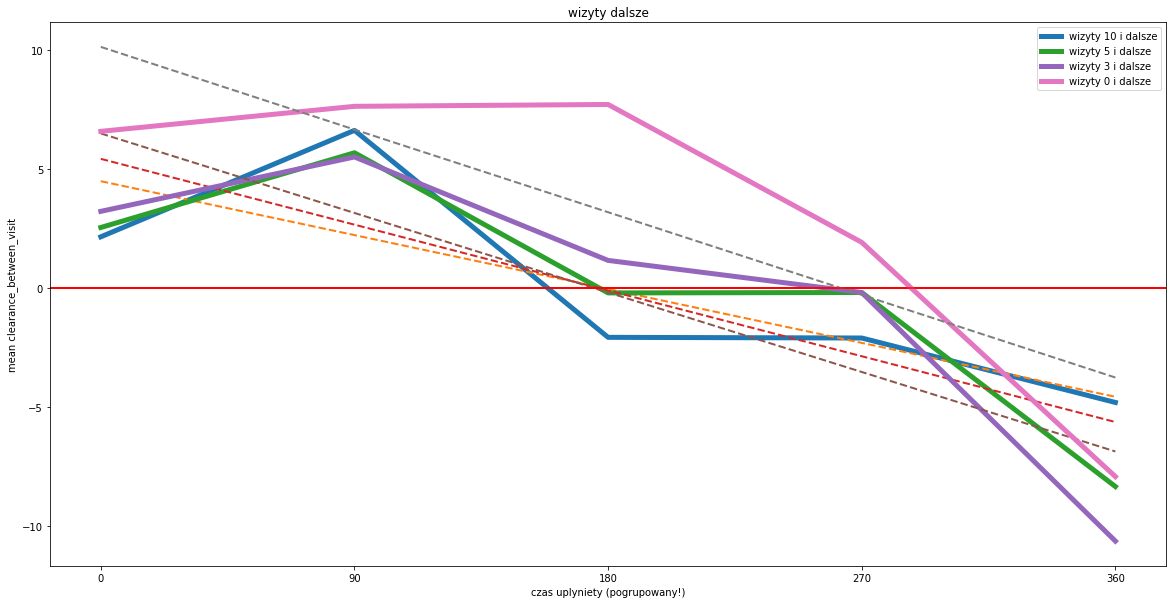

In [11]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,90,180,270,360], increment=90)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.544 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.373 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.479 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.485 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: nan (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,1,1,1,1
1,30,37,84,112,149
2,60,18,43,63,86
3,90,5,25,32,37
4,120,1,7,10,13
5,150,1,6,8,10
6,180,4,8,8,9
7,210,4,7,7,8
8,240,1,5,5,6
9,270,1,3,3,3


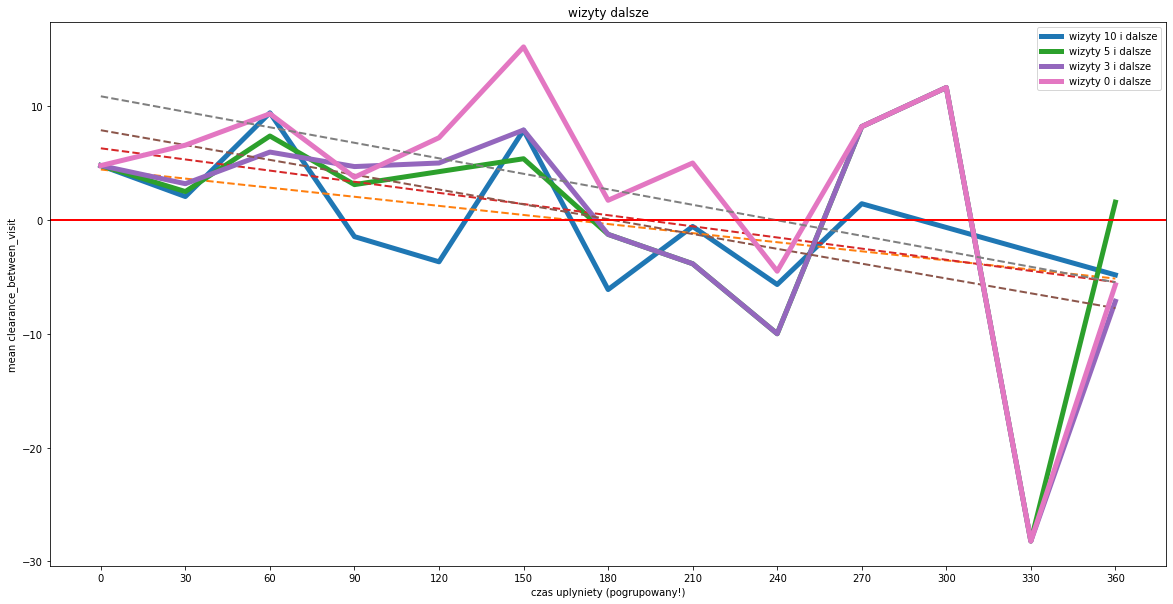

In [12]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,30,60,90,120,150,180,210,240,270,300,330,360], increment=30)

### All users plots:

In [13]:
# plot_all_users(non_moved_df, title = 'data bez zmian')
# plot_all_users(moved_df, title = 'data moved to 0s')
# plot_all_users(non0s_df, title = 'data bez 0s')

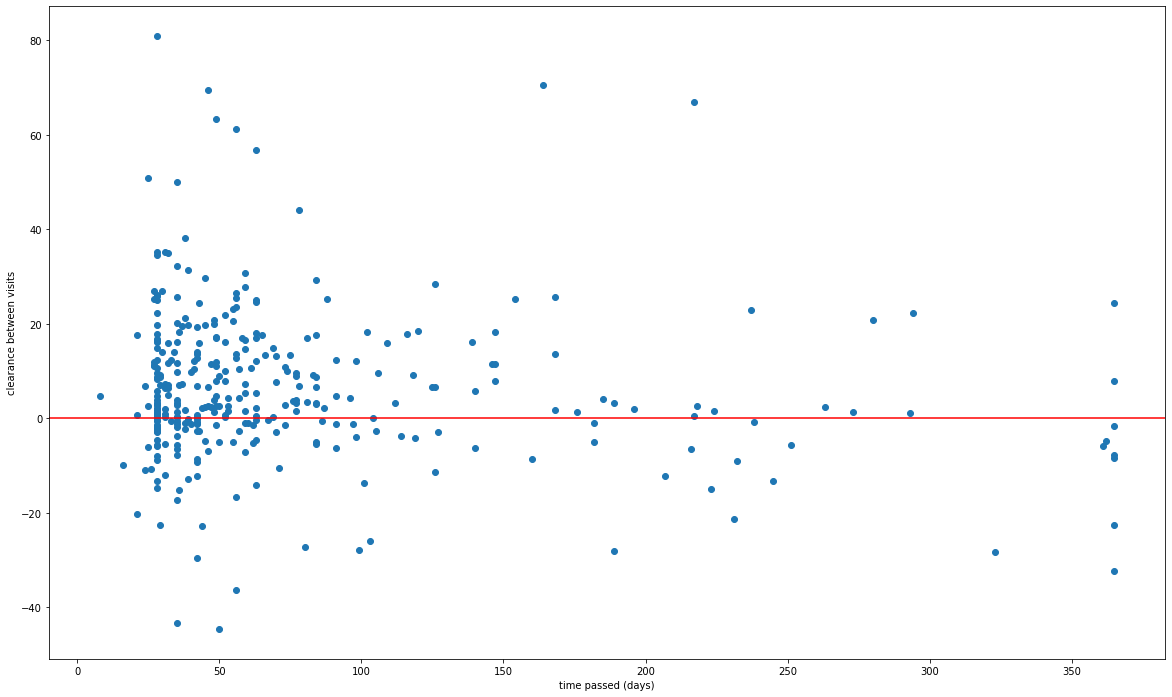

In [14]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = False)

## Scatter plots - dependent on visit:

Pearsons correlation: -0.154


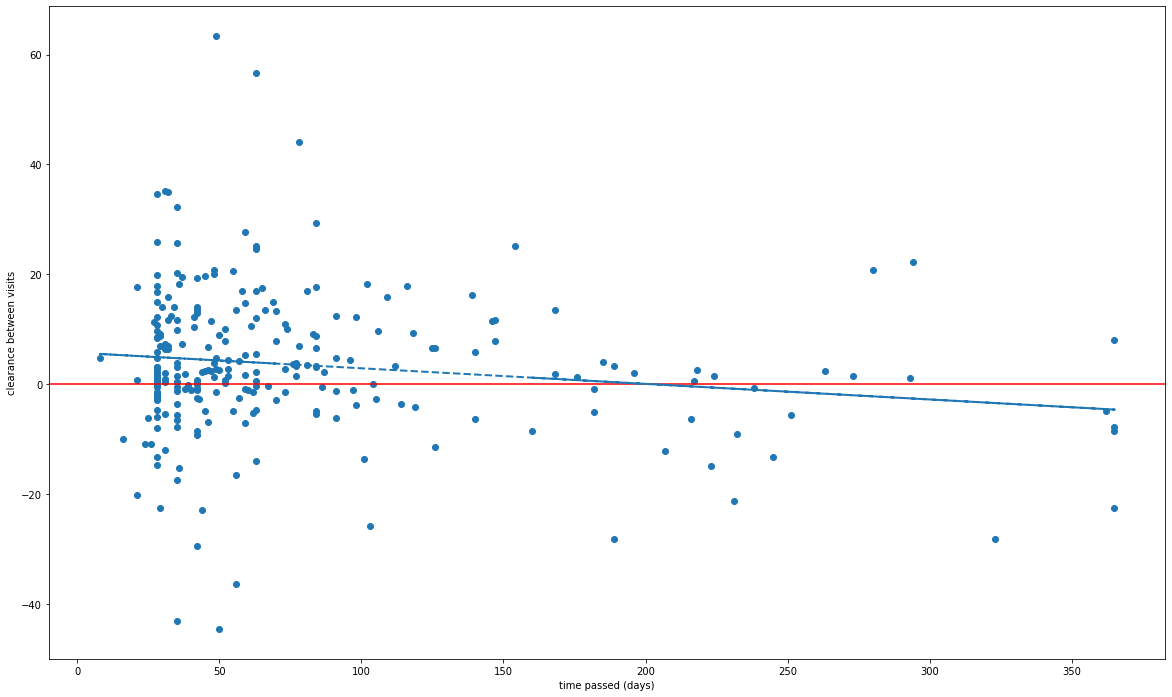

In [27]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = True)

## Scatter plots - dependent on visit:

In [37]:
non_moved_df.loc[(non_moved_df['below 0'] == True) & (non_moved_df['time'] <75)] # Send to Michal & Professor

,surname,time,summed_time,time_group,visit_number,total_clearance_between_visit,clearance_between_visit,------------,below 0
2,1.Gasek,70,1085,1,3,10.424290,-2.877283,,True
7,2. Kolodziejska,26,285,0,5,25.568145,-10.812106,,True
9,4. Krzyszton,35,35,0,3,-46.287701,-17.363140,,True
12,4. Krzyszton,50,221,1,6,-80.815464,-44.610700,,True
14,5.Wasowicz twarz,38,38,0,1,-2.334552,-2.334552,,True
...,...,...,...,...,...,...,...,...,...
296,57.Jadczyk,33,466,0,2,25.458404,-0.548225,,True
305,66.Swider,16,53,0,14,14.779153,-9.903905,,True
308,67.Swierczyńska,28,28,0,1,-5.586988,-5.586988,,True
311,67.Swierczyńska,36,117,0,4,36.694847,-15.192406,,True


Pearsons correlation: -0.138
Pearsons correlation: -0.154


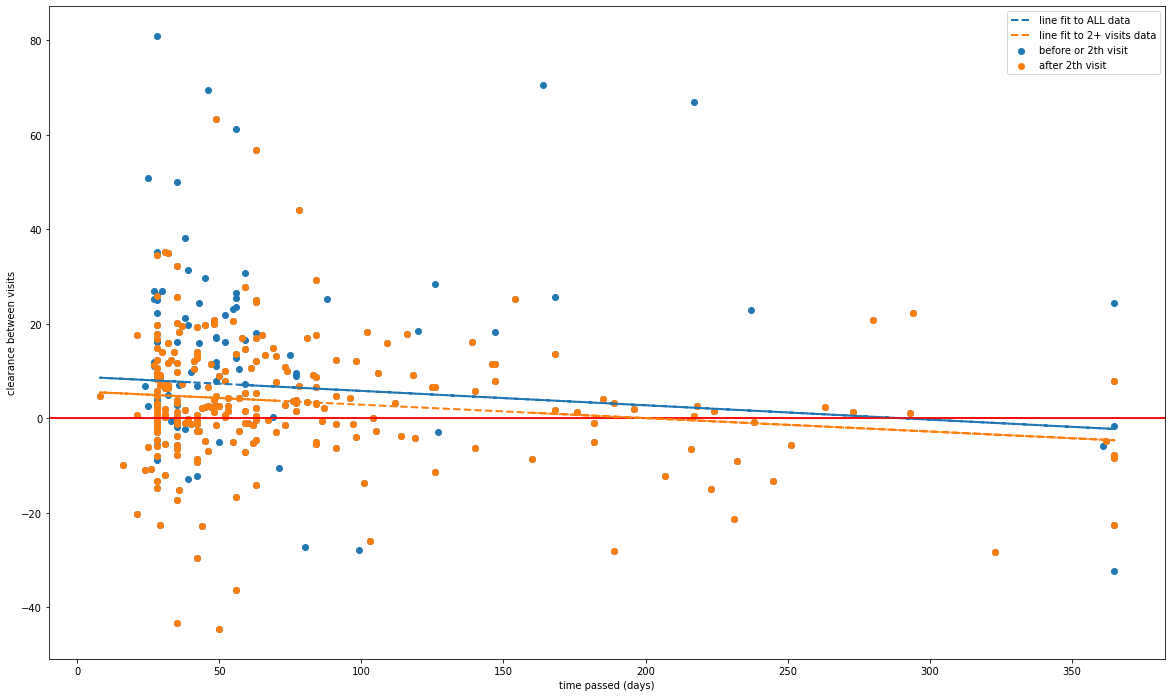

In [30]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 2th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'after 2th visit', label2= 'line fit to 2+ visits data')
plt.legend()

If time was longer than 360 I changed it to 360 to keep graph readable 

Pearsons correlation: -0.138
Pearsons correlation: -0.069


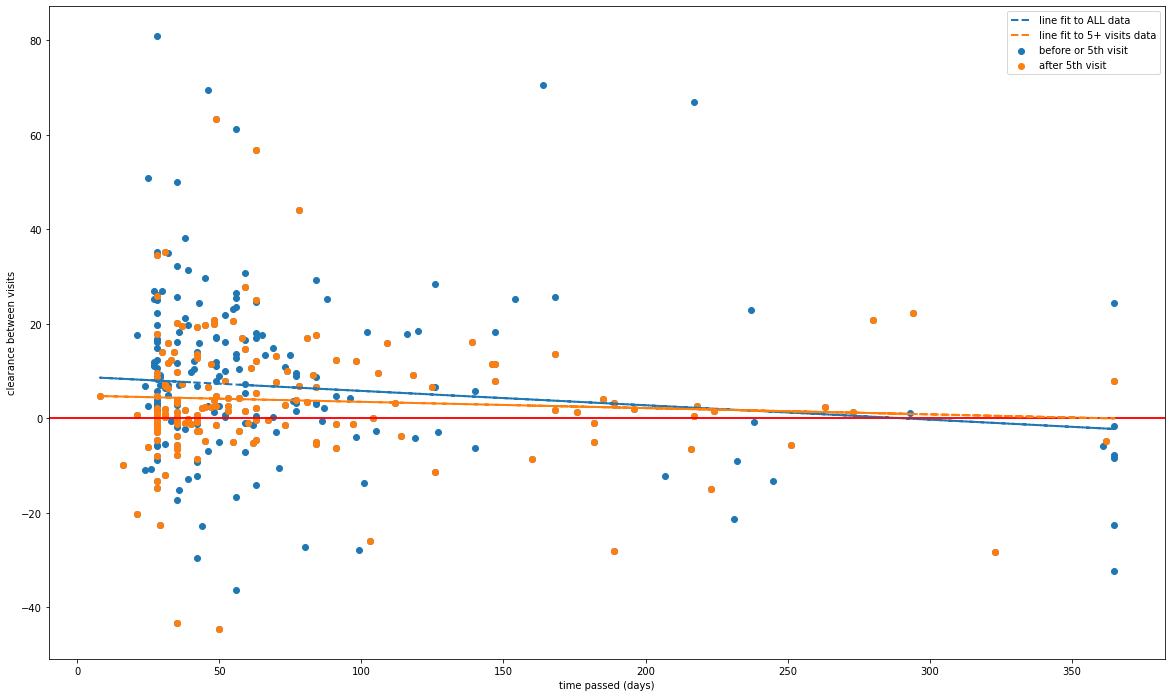

In [38]:
print('If time was longer than 360 I changed it to 360 to keep graph readable \n')

plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 5], label = 'after 5th visit', label2= 'line fit to 5+ visits data')
plt.legend()

Pearsons correlation: -0.138
Pearsons correlation: -0.252


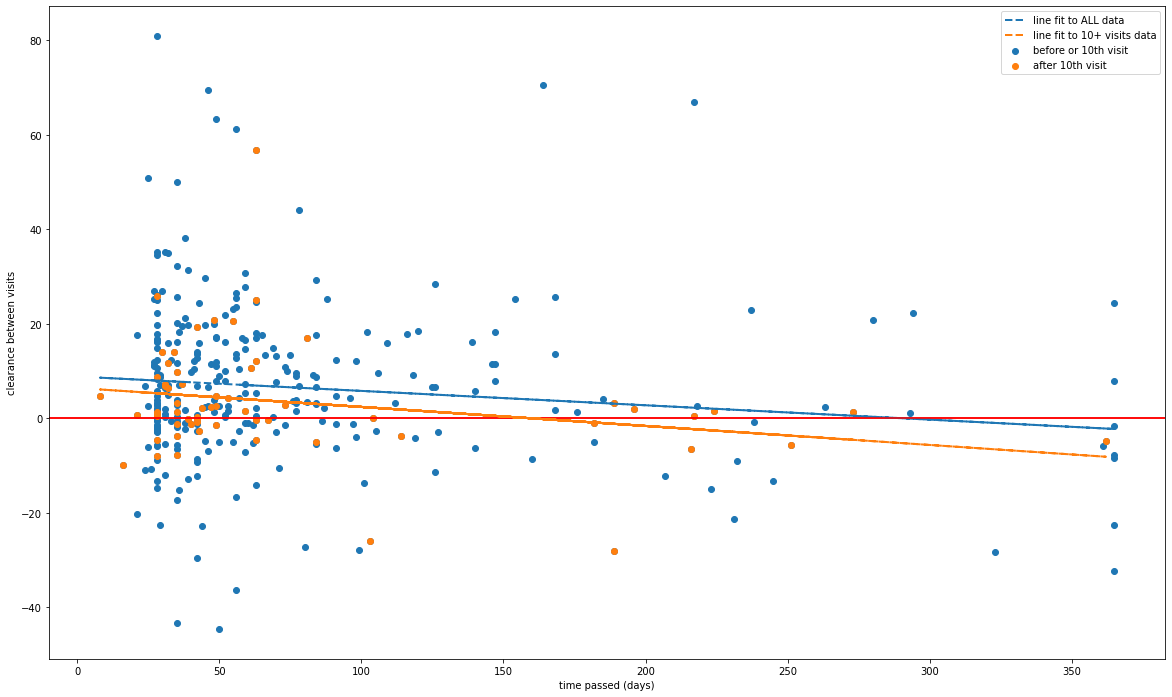

In [39]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 10th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 10], label = 'after 10th visit', label2= 'line fit to 10+ visits data')
plt.legend()

Pearsons correlation: -0.138
Pearsons correlation: -0.262


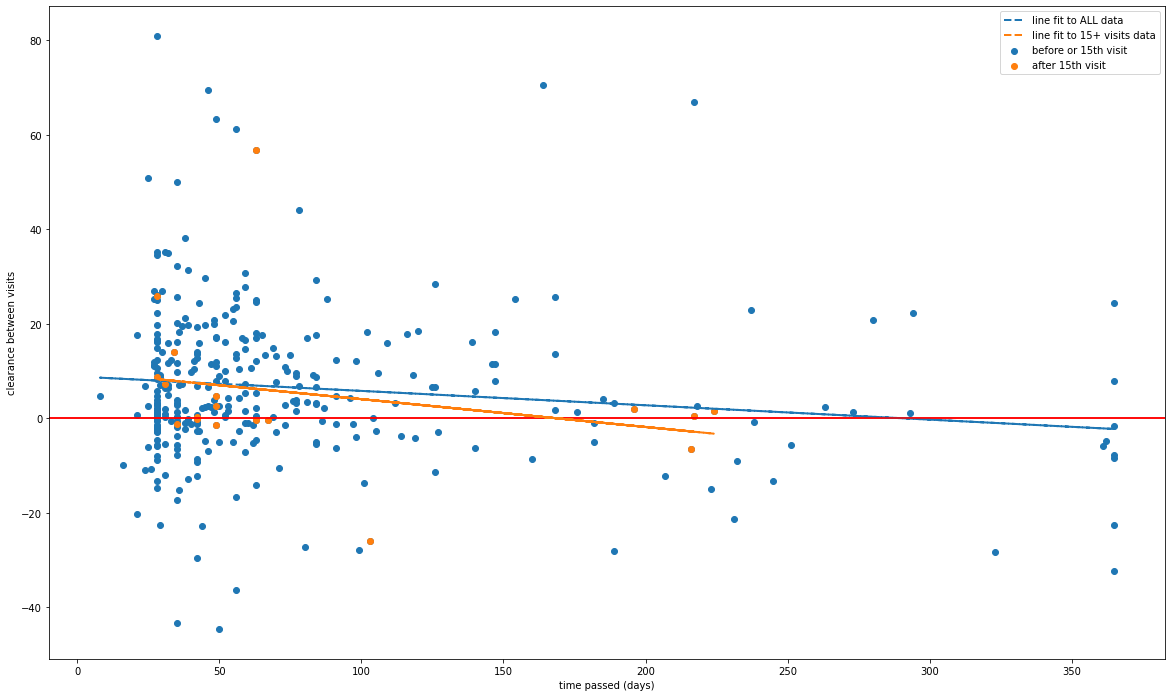

In [40]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 15th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 15], label = 'after 15th visit', label2= 'line fit to 15+ visits data')
plt.legend()

### Scatted plots - divided into time groups:

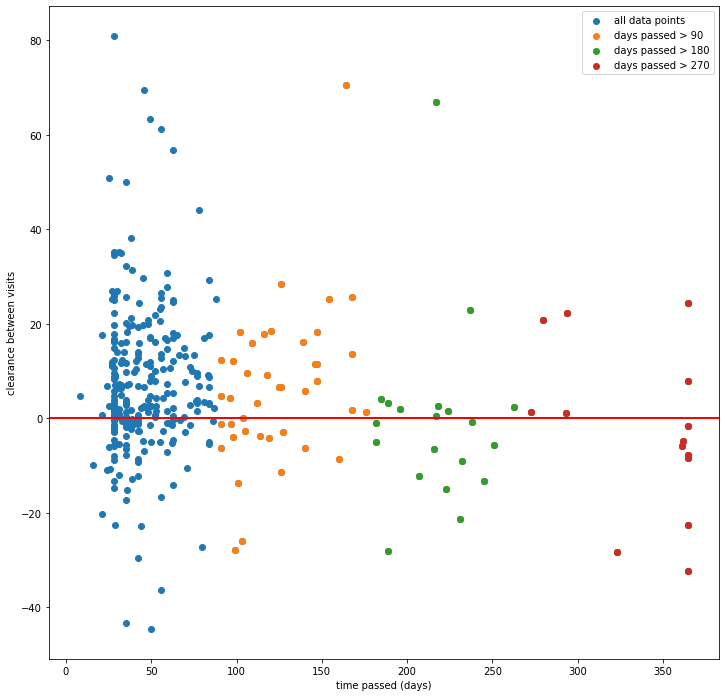

In [18]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data',plot_linear_fit = False)
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='',plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.138
Pearsons correlation: -0.165
Pearsons correlation: -0.116
Pearsons correlation: -0.378


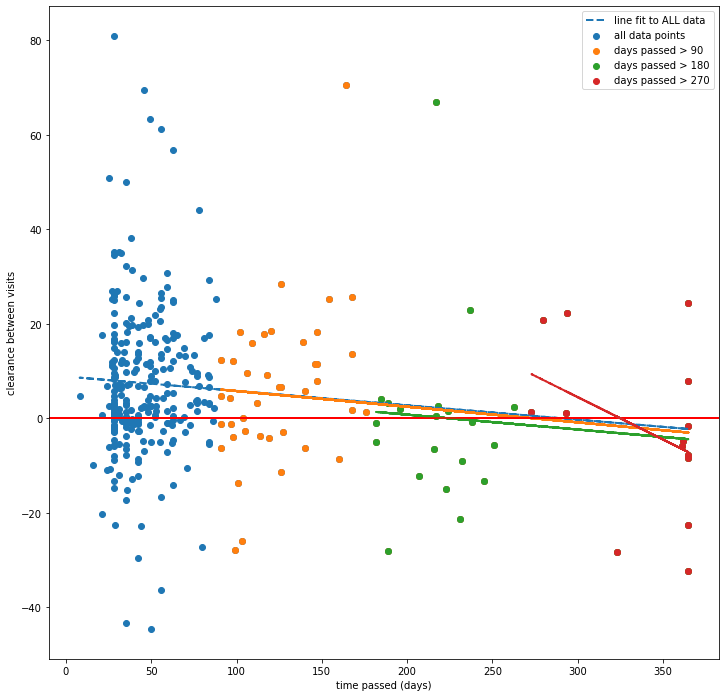

In [19]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data')
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='')
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='')
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='')
plt.legend()

## Scatter plots - clearnce vs visit_nr

Pearsons correlation: -0.184


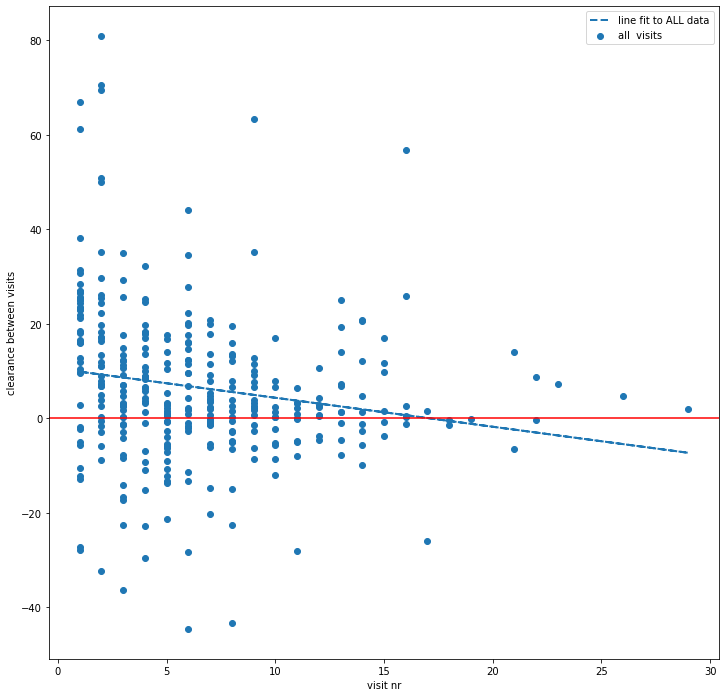

In [20]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data')
plt.legend()

##### Botplox explained:
<img src="boxplot_explained.png"
     alt="boxplot explained"/>

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

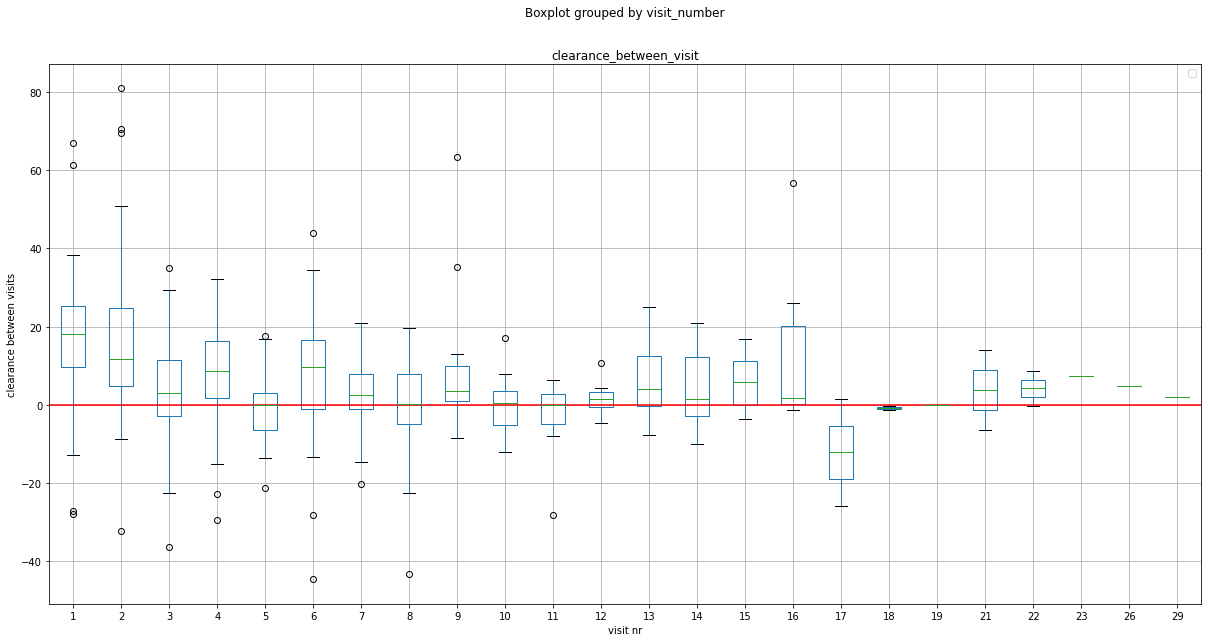

In [21]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.278


<Figure size 864x864 with 0 Axes>

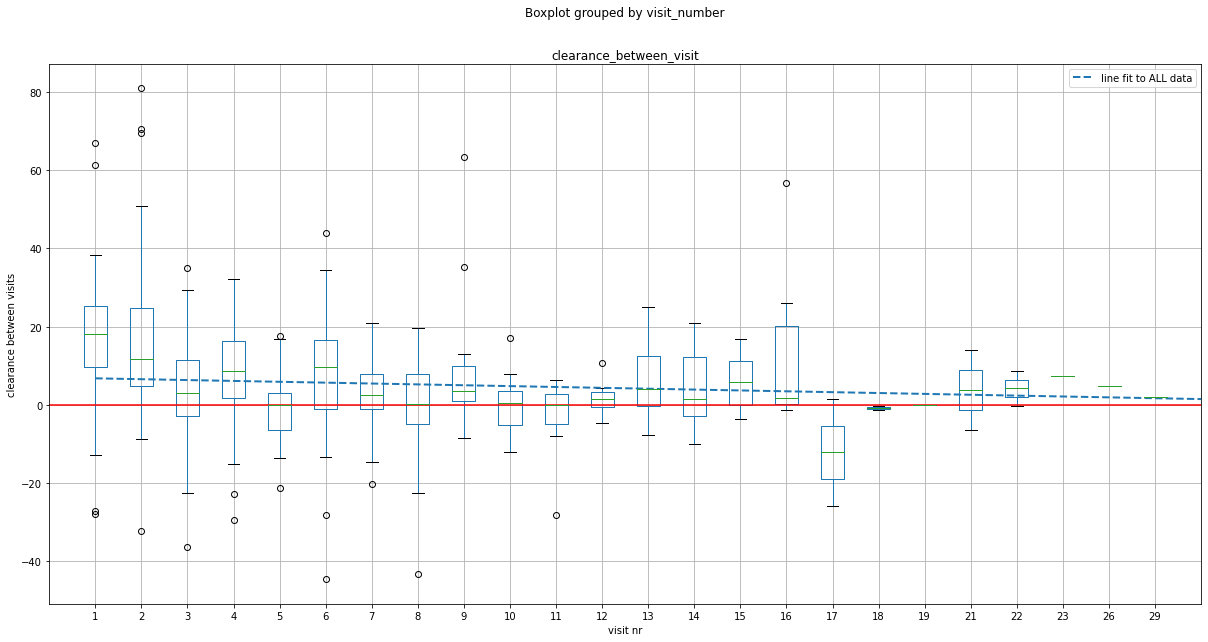

In [22]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = True)
plt.legend()

### Statistical comparison of the means between 2 samples (data divided based on time)

In [23]:

for days_passed_threshold in [60,120,180,240,300,360]:
    print()
    ttest_against_time_threshold(non_moved_df, 
                                 time_threshold = days_passed_threshold, 
                                 related_ttest = False)




test for days passsed: 60
left mean: 7.498
right mean: 4.869
p_value: 0.0773


test for days passsed: 120
left mean: 7.095
right mean: 3.334
p_value: 0.0626


test for days passsed: 180
left mean: 7.385
right mean: -1.326
p_value: 0.0016


test for days passsed: 240
left mean: 7.006
right mean: -2.964
p_value: 0.0071


test for days passsed: 300
left mean: 6.944
right mean: -7.937
p_value: 0.0022


test for days passsed: 360
left mean: 6.836
right mean: -5.685
p_value: 0.0117


### Statistical comparison of the means between 2 samples (data divided based on nr of visits)

In [41]:
for visit_nr_threshold in [2,5,10,15,20,25]:
    print()
    ttest_against_time_threshold(non_moved_df,
                                 visit_nr_threshold=visit_nr_threshold, 
                                 related_ttest = False)



test for nr visits: 2
left mean: 16.509
right mean: 3.499
p_value: 0.0


test for nr visits: 5
left mean: 9.172
right mean: 3.793
p_value: 0.0013


test for nr visits: 10
left mean: 7.209
right mean: 3.38
p_value: 0.0483


test for nr visits: 15
left mean: 6.588
right mean: 4.928
p_value: 0.3382


test for nr visits: 20
left mean: 6.545
right mean: 4.31
p_value: 0.3607


test for nr visits: 25
left mean: 6.517
right mean: 3.414
p_value: 0.3949


# Exploratory area: